In [1]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import fashion_mnist

In [2]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [4]:
type(X_train), type(y_train)

(numpy.ndarray, numpy.ndarray)

In [5]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [6]:
X_train=X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')/255
X_test=X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')/255

In [7]:
y_train=to_categorical(y_train, 10)
y_test=to_categorical(y_test, 10)

In [7]:
model=Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(10)
])

In [11]:
model.compile(optimizer='adam', loss=CategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
model.fit(X_train, y_train, batch_size=128, epochs=10)

Epoch 1/10
469/469 [==============================] - 4s 6ms/step - loss: 0.4457 - accuracy: 0.8427
Epoch 2/10
469/469 [==============================] - 3s 6ms/step - loss: 0.4406 - accuracy: 0.8446
Epoch 3/10
469/469 [==============================] - 4s 8ms/step - loss: 0.4354 - accuracy: 0.8461
Epoch 4/10
469/469 [==============================] - 3s 7ms/step - loss: 0.4310 - accuracy: 0.8486
Epoch 5/10
469/469 [==============================] - 3s 6ms/step - loss: 0.4270 - accuracy: 0.8498
Epoch 6/10
469/469 [==============================] - 3s 6ms/step - loss: 0.4235 - accuracy: 0.8505
Epoch 7/10
469/469 [==============================] - 3s 5ms/step - loss: 0.4193 - accuracy: 0.8528
Epoch 8/10
469/469 [==============================] - 3s 5ms/step - loss: 0.4161 - accuracy: 0.8536
Epoch 9/10
469/469 [==============================] - 3s 6ms/step - loss: 0.4133 - accuracy: 0.8541
Epoch 10/10
469/469 [==============================] - 3s 5ms/step - loss: 0.4098 - accuracy: 0.8561

In [12]:
loss, acc=model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 103.4657 - accuracy: 0.6709


In [13]:
loss, acc

(103.46569061279297, 0.6708999872207642)

In [15]:
from sklearn.metrics import classification_report

# Make predictions
y_pred = model.predict(X_test)

# Convert predictions to class labels
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(y_test, axis=1)

# Generate classification report
print(classification_report(y_true_labels, y_pred_labels))

313/313 [==============================] - 1s 3ms/step
              precision    recall  f1-score   support

           0       0.89      0.62      0.73      1000
           1       0.95      0.96      0.96      1000
           2       0.81      0.20      0.32      1000
           3       0.91      0.70      0.79      1000
           4       0.38      0.99      0.55      1000
           5       1.00      0.27      0.42      1000
           6       0.44      0.27      0.33      1000
           7       0.82      0.74      0.78      1000
           8       0.86      0.96      0.91      1000
           9       0.56      1.00      0.72      1000

    accuracy                           0.67     10000
   macro avg       0.76      0.67      0.65     10000
weighted avg       0.76      0.67      0.65     10000



1/1 [==============================] - 0s 51ms/step
sneaker


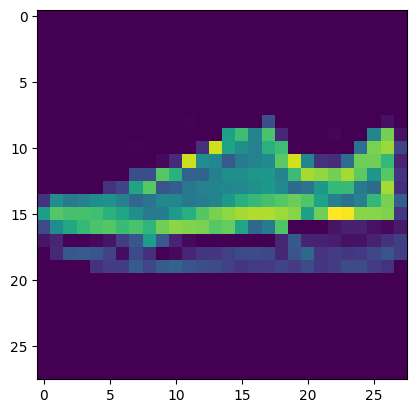

In [19]:
import matplotlib.pyplot as plt
def predict(id):
    labels = ['t_shirt', 'trouser', 'pullover', 'dress', 'coat', 'sandal', 'shirt', 'sneaker', 'bag', 'ankle_boots'] # Insert After Running Above Code
    predictions = model.predict(X_test[id:id+1])
    label = labels[np.argmax(predictions)]
    print(label)
    plt.imshow(X_test[id])
    plt.show()
predict(9)